# Impor Libraries

In [55]:
# # !pip uninstall gensim -y 
# !pip install gensim #==3.8.3 #4.3.3
# !pip install scikit-learn
# !pip install numpy
# !pip install torch==2.3.0 torchvision==0.18.0 torchaudio==2.3.0 --index-url https://download.pytorch.org/whl/cu121
# # !pip uninstall tensorflow -y
# !pip install tensorflow==2.17.0
# !pip install matplotlib
# !pip install  dgl -f https://data.dgl.ai/wheels/torch-2.3/cu121/repo.html

In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath("../.."))
# Reload modulos automaticamente
%load_ext autoreload
%autoreload 2
import os
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
# from utils import 
import csv
import bz2
import numpy as np
import os
from collections import Counter

from gensim.models import Word2Vec
from collections import Counter
import torch


In [2]:
TOR_LABELS_DICT = {'P2P':0, 'C2P': 1,'P2C': 2}
TOR_CSV_LABELS_DICT = {'P2P':0,'P2C': -1}
RESULTS_PATHS = '/media/valentina/KINGSTON/TESIS/resultados/'

PATH = "/home/valentina/Desktop/GIT/TrabajoTesis/"
PATH = '/media/valentina/KINGSTON/TESIS/'

class_names = ['P2P', 'C2P', 'P2C']
DATA = 'data/'

# Dataset entrenamiento RNA para relaciones entre AS
MODEL_NAME = 'NN_Inference'
MES = 'febrero'

# Importar Emberddings

In [1437]:
ls data/embeddings/grado_attr/

embeddings_ribs_DP_GAT_grado_attr.pt
embeddings_ribs_DP_GCN_grado_attr.pt
embeddings_ribs_DP_GraphSAGE_grado_attr.pt
embeddings_ribs_MLP_GAT_grado_attr.pt
embeddings_ribs_MLP_GCN_grado_attr.pt
embeddings_ribs_MLP_GraphSAGE_grado_attr.pt


In [2003]:
# # CASO
# # attr = 'grado_attr' #'mis_attr'
# attr = 'mis_attr'
# # degree = '_degree'  # ''
# # degree = '_mio_attr'  
# embeddings_path = PATH +f'data/embeddings/{attr}/embeddings_ribs_DP_GCN_{attr}.pt'
# # embeddings_path = f'data/embeddings/{attr}/embeddings_ribs_DP_GraphSAGE_{attr}.pt'
# # embeddings_path = f'data/embeddings/{attr}/embeddings_ribs_DP_GAT_{attr}.pt'

# # # # # # # CAOS
# # embeddings_path = f'data/embeddings/{attr}/embeddings_ribs_MLP_GCN_{attr}.pt'
# # embeddings_path = f'data/embeddings/{attr}/embeddings_ribs_MLP_GraphSAGE_{attr}.pt'
# # embeddings_path = f'data/embeddings/{attr}/embeddings_ribs_MLP_GAT_{attr}.pt'

# embeddings_name = embeddings_path.split('/')[-1].split('.')[0]  # Nombre del archivo sin extensión
# print('nombre embeddings:', embeddings_name)

# # OTROS CASOS
# # embeddings_path = 'data/embeddings/embeddings_ribs_PageRank.pt'

# embeddings_pt = torch.load(embeddings_path)  # asegúrate que sea un tensor


In [2004]:
ls /media/valentina/KINGSTON/TESIS/data/embeddings/graphs2024/embeddings_ribs_GCN_out_degree_febrero.pt

/media/valentina/KINGSTON/TESIS/data/embeddings/graphs2024/embeddings_ribs_GCN_out_degree_febrero.pt*


In [2446]:
ls /media/valentina/KINGSTON/TESIS/data/embeddings/bgp2vec.word2vec

/media/valentina/KINGSTON/TESIS/data/embeddings/bgp2vec.word2vec*


In [3]:
# Embeddings de mi ssd

# /////////////////////////////////////////////////////////////////////////////////////////////////////////////////

attr = 'mis_attr'
PATH = '/media/valentina/KINGSTON/TESIS/'

# Mis embeddings de febrero
embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_DotProduct_GCN_mis_attr_febrero.pt'
# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_DotProduct_GraphSAGE_mis_attr_febrero.pt'
# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_DotProduct_GAT_mis_attr_febrero.pt'

# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_MLP_GCN_mis_attr_febrero.pt'
# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_MLP_GraphSAGE_mis_attr_febrero.pt'
# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_MLP_GAT_mis_attr_febrero.pt'

# /////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# # DepWalk
# attr = 'deepWalk'
# PATH = '/media/valentina/KINGSTON/TESIS/'

# embeddings_path = '/media/valentina/KINGSTON/TESIS/data/embeddings/graphs2024/embeddings_deepWalk_febrero.pt' 
# /////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# bgp2vec
# attr = 'bgp2vec'
# embeddings_path = '/media/valentina/KINGSTON/TESIS/data/embeddings/bgp2vec.word2vec'

# /////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# attr = 'grado_attr'
# PATH = '/media/valentina/KINGSTON/TESIS/'


# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_DotProduct_GCN_{attr}_febrero.pt'
# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_DotProduct_GraphSAGE_{attr}_febrero.pt'
# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_DotProduct_GAT_{attr}_febrero.pt'

# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_MLP_GCN_{attr}_febrero.pt'
# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_MLP_GraphSAGE_{attr}_febrero.pt'
# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_MLP_GAT_{attr}_febrero.pt'

# /////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# Embeddings creados a partir de la prediccion pagaRank de 2024 nuestro

# attr = 'pagerank'
# PATH = '/media/valentina/KINGSTON/TESIS/'

# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_GCN_{attr}_febrero.pt'
# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_GraphSAGE_{attr}_febrero.pt'
# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_GAT_{attr}_febrero.pt'

# /////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# Embeddings creados a partir del grafo de grafo 2024 nuestro
# attr = 'out_degree'
# PATH = '/media/valentina/KINGSTON/TESIS/'

# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_GCN_{attr}_febrero.pt'
# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_GraphSAGE_{attr}_febrero.pt'
# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_GAT_{attr}_febrero.pt'


# /////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# attr = 'closness'
# PATH = '/media/valentina/KINGSTON/TESIS/'

# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_GCN_{attr}_febrero.pt'
# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_GraphSAGE_{attr}_febrero.pt'
# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/full/embeddings_ribs_GAT_{attr}_febrero.pt'

# /////////////////////////////////////////////////////////////////////////////////////////////////////////////////

# Embeddings cracdo a partir Grafo julio 2022 de otro paper 
# attr = '2022_attr' 
# PATH = '/media/valentina/KINGSTON/TESIS/'

# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/2022julio/embeddings_ribs_DotProduct_GCN_{attr}_febrero.pt'
# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/2022julio/embeddings_ribs_DotProduct_GraphSAGE_{attr}_febrero.pt'
# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/2022julio/embeddings_ribs_DotProduct_GAT_{attr}_febrero.pt'

# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/2022julio/embeddings_ribs_MLP_GCN_{attr}_febrero.pt'
# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/2022julio/embeddings_ribs_MLP_GraphSAGE_{attr}_febrero.pt'
# embeddings_path = PATH + f'data/embeddings/graphs2024/febrero/2022julio/embeddings_ribs_MLP_GAT_{attr}_febrero.pt'


# /////////////////////////////////////////////////////////////////////////////////////////////////////////////////




embeddings_name = embeddings_path.split('/')[-1].split('.')[0]  # Nombre del archivo sin extensión
embeddings_pt = torch.load(embeddings_path)  # asegúrate que sea un tensor


In [ ]:
ls /media/valentina/KINGSTON/TESIS/data/embeddings/graphs2024/febrero

2022julio/
full/
model_emb_DotProduct_GAT_2022_attr_febrero.pth*
model_emb_DotProduct_GAT_mis_attr_febrero.pth*
model_emb_DotProduct_GCN_2022_attr_febrero.pth*
model_emb_DotProduct_GCN_mis_attr_febrero.pth*
model_emb_DotProduct_GraphSAGE_2022_attr_febrero.pth*
model_emb_DotProduct_GraphSAGE_mis_attr_febrero.pth*
model_emb_GAT_out_degree_febrero.pth*
model_emb_GAT_pagerank_febrero.pth*
model_emb_GCN_mis_attr_febrero.pth*
model_emb_GCN_out_degree_febrero.pth*
model_emb_GCN_pagerank_febrero.pth*
model_emb_GraphSAGE_mis_attr_febrero.pth*
model_emb_GraphSAGE_out_degree_febrero.pth*
model_emb_GraphSAGE_pagerank_febrero.pth*
model_emb_MLP_GAT_2022_attr_febrero.pth*
model_emb_MLP_GAT_mis_attr_febrero.pth*
model_emb_MLP_GCN_2022_attr_febrero.pth*
model_emb_MLP_GCN_mis_attr_febrero.pth*
model_emb_MLP_GraphSAGE_2022_attr_febrero.pth*
model_emb_MLP_GraphSAGE_mis_attr_febrero.pth*
nose/
roc_curve_GAT_MLP_2022_attr.png*
roc_curve_GCN_MLP_2022_attr.png*
roc_curve_GraphSAGE_MLP_2022_attr.png*
roc_curv

In [ ]:
ls /media/valentina/KINGSTON/TESIS/data/embeddings/graphs2024/febrero/full/embeddings_ribs_DotProduct_GCN_mis_attr_febrero.pt


/media/valentina/KINGSTON/TESIS/data/embeddings/graphs2024/febrero/full/embeddings_ribs_DotProduct_GCN_mis_attr_febrero.pt*


In [ ]:
# # # Importar embeddings BGP2VEC
# # from gensim.models import Word2Vec
# attr = 'bgp2vec'
# embeddings_name = 'bgp2vec'
# BGP2Vec_model = Word2Vec.load('/media/valentina/KINGSTON/TESIS/data/embeddings/bgp2vec.word2vec')

# # Obtener la matriz de embeddings
# embeddings = BGP2Vec_model.wv.vectors
# total_ASNs, embedding_vecor_length = embeddings.shape


# print(f"[TOTAL ASN]: {total_ASNs}" )
# print(f"[EMBEDDINGS LEN]: {embedding_vecor_length}")
# print(f"[EMBEDDINGS] {embeddings}")


# asn_to_index = BGP2Vec_model.wv.key_to_index
# print(f"[ASN TO INDEX]: {asn_to_index}")
# print(f"[TAMANO]: {len(asn_to_index)}")

[TOTAL ASN]: 41165
[EMBEDDINGS LEN]: 32
[EMBEDDINGS] [[ 1.11341454e-01 -1.94397256e-01  1.09998202e+00 ...  3.18248391e-01
   7.57382691e-01 -6.02637410e-01]
 [-2.91189551e-01  3.05169165e-01  8.12452435e-01 ... -7.27830112e-01
   7.29120731e-01 -1.14762044e+00]
 [ 3.10108453e-01 -1.22022498e+00 -1.90660059e-01 ... -1.25457609e+00
   9.19439137e-01 -5.05565107e-01]
 ...
 [-4.14547510e-03 -2.85490267e-02  2.93800924e-02 ...  2.71399524e-02
   1.14564868e-02 -2.89793238e-02]
 [-4.31441888e-03 -2.06896793e-02  1.06392959e-02 ...  3.06044705e-03
  -1.60138328e-02 -1.76269468e-02]
 [ 2.55008675e-02  6.49789523e-04  9.02430678e-04 ... -5.83223440e-03
  -8.00340809e-03 -1.51119446e-02]]
[ASN TO INDEX]: {'3356': 0, '1299': 1, '6939': 2, '174': 3, '2914': 4, '3257': 5, '6461': 6, '6762': 7, '6453': 8, '9002': 9, '3491': 10, '12956': 11, '7018': 12, '12389': 13, '199524': 14, '8220': 15, '5511': 16, '6830': 17, '701': 18, '34927': 19, '9498': 20, '4637': 21, '3216': 22, '13335': 23, '37468': 24,

In [4]:
import torch

# Cargar el tensor de embeddings
total_ASNs, embedding_vecor_length = embeddings_pt.shape
embeddings = embeddings_pt.detach().numpy()

print(f"[TOTAL ASN]: {total_ASNs}" )
print(f"[EMBEDDINGS LEN]: {embedding_vecor_length}")
print(f"[EMBEDDINGS] {embeddings}")

[TOTAL ASN]: 42242
[EMBEDDINGS LEN]: 32
[EMBEDDINGS] [[-0.02880066 -0.0361732  -0.04041045 ... -0.01471644 -0.02313555
  -0.0279297 ]
 [ 0.02064504  0.02578152  0.02158753 ...  0.12013759 -0.08536631
   0.10906264]
 [-0.06661672 -0.03226236 -0.03633596 ... -0.01105129 -0.06814347
   0.04002753]
 ...
 [ 0.02464884  0.00271261  0.02047463 ...  0.03833848 -0.01118074
   0.03260041]
 [ 0.06981128  0.04631457  0.06362683 ...  0.09186982 -0.03160005
   0.10427863]
 [ 0.01227224 -0.01002988 -0.00831005 ...  0.0309241  -0.03675584
   0.05504151]]


In [5]:
asn_to_index = {}
for  i, asn in enumerate(embeddings):
    asn_to_index[str(i)] = i

In [6]:
# Mapeo ASN -> ID usado en los embeddings
print(f"[ASN TO INDEX]: {asn_to_index}")
print(f"[TAMANO]: {len(asn_to_index)}")

[ASN TO INDEX]: {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19, '20': 20, '21': 21, '22': 22, '23': 23, '24': 24, '25': 25, '26': 26, '27': 27, '28': 28, '29': 29, '30': 30, '31': 31, '32': 32, '33': 33, '34': 34, '35': 35, '36': 36, '37': 37, '38': 38, '39': 39, '40': 40, '41': 41, '42': 42, '43': 43, '44': 44, '45': 45, '46': 46, '47': 47, '48': 48, '49': 49, '50': 50, '51': 51, '52': 52, '53': 53, '54': 54, '55': 55, '56': 56, '57': 57, '58': 58, '59': 59, '60': 60, '61': 61, '62': 62, '63': 63, '64': 64, '65': 65, '66': 66, '67': 67, '68': 68, '69': 69, '70': 70, '71': 71, '72': 72, '73': 73, '74': 74, '75': 75, '76': 76, '77': 77, '78': 78, '79': 79, '80': 80, '81': 81, '82': 82, '83': 83, '84': 84, '85': 85, '86': 86, '87': 87, '88': 88, '89': 89, '90': 90, '91': 91, '92': 92, '93': 93, '94': 94, '95': 95, '96': 96, '97': 97, '98': 98, '99': 99, '10

In [7]:
print(asn_to_index.get('1299'))
print(asn_to_index['1299'])
print(type(asn_to_index['1299']))

1299
1299
<class 'int'>


# Importar ToR Dataset


In [ ]:
PATH + DATA

'/media/valentina/KINGSTON/TESIS/data/'

In [ ]:
ls /home/valentina/Desktop/GIT/TrabajoTesis/data

CAIDA_AS_Relationships/        sanitized_rib_enero_2024.txt
dgl_graph/                     sanitized_rib_febrero_2024.txt
dgl_graphs/                    sanitized_rib_marzo_2024.txt
embeddings/                    tor_data_abril/
node_features_mio_febrero.csv  tor_data_enero/
peeringdb/                     tor_data_febrero/
sanitized_rib_abril_2024.txt   tor_data_marzo/


In [8]:
# Cargar x_training y x_test
x_training = np.load(PATH + DATA + f"ToR_data/tor_data_{MES}/x_training.npy").astype(int)
x_test = np.load(PATH + DATA + f"ToR_data/tor_data_{MES}/x_test.npy").astype(int)


# Cargar y_training y y_test
y_training = np.load(PATH + DATA + f"ToR_data/tor_data_{MES}/y_training.npy").astype(int)
y_test = np.load(PATH + DATA + f"ToR_data/tor_data_{MES}/y_test.npy").astype(int)


print("x_training.shape:", x_training.shape)
print("y_training.shape:", y_training.shape)
print("x_test.shape:", x_test.shape)
print("y_test.shape:", y_test.shape)

print('x_training:',x_training)
print('y_training:',y_training)
print('x_test:',x_test)
print('y_test:',y_test)

x_training.shape: (782043, 2)
y_training.shape: (782043,)
x_test.shape: (195511, 2)
y_test.shape: (195511,)
x_training: [[ 50917  47787]
 [263939  52320]
 [ 49544  47737]
 ...
 [136557   9318]
 [ 15576   8953]
 [ 37100   3327]]
y_training: [0 0 0 ... 0 0 0]
x_test: [[  1299  12025]
 [198930  37497]
 [ 43380  48919]
 ...
 [ 43727 328832]
 [134788  63927]
 [  3399   9119]]
y_test: [2 0 0 ... 0 0 0]


In [5]:
Counter(y_training)

Counter({0: 534992, 1: 123552, 2: 123499})

los modelos de embeddings trabajan con índices, no con ASNs reales.

In [9]:
# ASN a índice -> x_training y x_test
x_training_mapped = []
y_training_filtered = []

# Recorrer par (asn, asn) y agregamos válidos
for (a, b), y in zip(x_training, y_training):
    a_index = asn_to_index.get(str(a), 0)
    b_index = asn_to_index.get(str(b), 0)

    # Ignorar si índice es 0 
    if a_index == 0 or b_index == 0 :
        continue
    
    x_training_mapped.append([a_index, b_index])
    y_training_filtered.append(y)

# Convertir listas a arrays de NumPy
x_training_mapped = np.array(x_training_mapped)
y_training_filtered = np.array(y_training_filtered)

# ---------------------------------------------------------------------------

x_test_mapped = []
y_test_filtered = []

for (a, b), y in zip(x_test, y_test):
    a_index = asn_to_index.get(str(a), 0)
    b_index = asn_to_index.get(str(b), 0)

    # Ignorar si índice es 0 
    if a_index == 0 or b_index == 0:
        continue
    
    x_test_mapped.append([a_index, b_index])
    y_test_filtered.append(y)

x_test_mapped = np.array(x_test_mapped)
y_test_filtered = np.array(y_test_filtered)

# Guardar los datos corregidos
np.save(PATH + DATA +f"ToR_data/tor_data_{MES}/x_training_mapped.npy", x_training_mapped)
np.save(PATH + DATA +f"ToR_data/tor_data_{MES}/y_training_filtered.npy", y_training_filtered)
np.save(PATH + DATA +f"ToR_data/ToR_data_{MES}/x_test_mapped.npy", x_test_mapped)
np.save(PATH + DATA +f"ToR_data/tor_data_{MES}/y_test_filtered.npy", y_test_filtered)

## Modelo NN

In [10]:
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Sequential
from keras.layers import Dense, Reshape, Flatten
# # from keras.layers import LSTM
from keras.layers import Embedding
# # from keras.preprocessing import sequence
# # from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

from sklearn.utils import class_weight


2025-09-24 13:58:20.962650: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-24 13:58:21.108107: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-24 13:58:21.174574: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-24 13:58:21.194027: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-24 13:58:21.303818: I tensorflow/core/platform/cpu_feature_guar

In [11]:
import keras
print('KERAS: ',keras.__version__)
print("[SHAPE EMDEDINGS]",embeddings.shape)

KERAS:  3.10.0
[SHAPE EMDEDINGS] (42242, 32)


In [12]:
# Configuración de la RNN BGP2VEC
experiment = None
num_classes = len(class_names)
embedding_trainable = False  # Si se desea entrenar los embeddings
input_length = 2  # longitud de la secuencia de entrada
embedding_vector_length = embeddings.shape[1]  # tamaño de los vectores de embedding
total_ASNs = embeddings.shape[0] #42865 # Tamaño del vocabulario


# Registro de parámetros del experimento si es aplicable
if experiment is not None:
    experiment.log_parameter("embedding_trainable", embedding_trainable)

# Definición del modelo
model = Sequential()
model.add(Embedding(total_ASNs, embedding_vector_length, input_length=input_length,
                    weights=[embeddings], trainable=embedding_trainable))  # Asegúrate de que 'embeddings' esté definida
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))

model.add(Reshape((32, 2)))  # Cambia Reshape para reflejar las dimensiones correctas
#model.add(Reshape((model.output_shape[2], model.output_shape[1])))  # Cambia Reshape para reflejar las dimensiones correctas
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(Reshape((32,16)))  # Cambia Reshape para reflejar las dimensiones correctas
#model.add(Reshape((model.output_shape[2], model.output_shape[1])))  # Cambia Reshape para reflejar las dimensiones correctas
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

/home/valentina/Desktop/GIT/TrabajoTesis/ennv310/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, AUC

lr = 0.001 #0.005
# Definir Adam con learning rate personalizado
optimizer = Adam(learning_rate=lr)

# Compilar el modelo con este optimizador
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy',
                Precision(name='precision'),
                Recall(name='recall'),
                AUC(name='auc')])





In [14]:
# # Compilación del modelo
# model.compile(loss='categorical_crossentropy', optimizer='adam', 
#               metrics=['accuracy',
#                 Precision(name='precision'),
#                 Recall(name='recall'),
#                 AUC(name='auc')])



# Resumen del modelo
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     1,351,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,351,744 (5.16 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,351,744 (5.16 MB)

None


In [15]:
# Convertir las clases a un one-hot vector
y_training_vector = to_categorical(y_training_filtered, num_classes) 
y_test_vector = to_categorical(y_test_filtered, num_classes)
print("[Y TRAINING VECTOR]",y_training_vector, y_training_vector.shape)
print("[X TRAINING]",y_training_filtered, y_training_filtered.shape)

[Y TRAINING VECTOR] [[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]] (242518, 3)
[X TRAINING] [2 0 1 ... 0 0 0] (242518,)


In [16]:
print(y_training_filtered)
y_training_filtered.shape

[2 0 1 ... 0 0 0]


(242518,)

In [17]:
# Verificar correcta conversión de las clases
print("[NUMERO DE CLASES]",num_classes)
print("[Y TRAINIG]:",len(y_training),y_training)
print('[UNIQUE Y TRAINING]',np.unique(y_training))  # valores únicos de las etiquetas en y_training
print('[UNIQUE Y TEST]',np.unique(y_test))      # valores únicos de las etiquetas en y_test

[NUMERO DE CLASES] 3
[Y TRAINIG]: 782043 [0 0 0 ... 0 0 0]
[UNIQUE Y TRAINING] [0 1 2]
[UNIQUE Y TEST] [0 1 2]


In [18]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# EarlyStopping: detiene el entrenamiento si no mejora la val_loss después de 10 epochs
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=8,             # número de epochs sin mejora
    restore_best_weights=True,
    verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,              # reduce a la mitad
    patience=5,              # espera 5 epochs sin mejora
    verbose=1
)


In [19]:
# Fit model
checkpointer_acc = ModelCheckpoint(
    monitor='val_accuracy',  # <--- CORREGIDO
    filepath=PATH + DATA + MODEL_NAME + '_acc.weights.h5',
    verbose=1, 
    save_best_only=True, 
    save_weights_only=True
)

checkpointer_loss = ModelCheckpoint(
    monitor='val_loss',
    filepath=PATH + DATA + MODEL_NAME + '_loss.weights.h5', 
    verbose=1, 
    save_best_only=True, 
    save_weights_only=True
)


# callbacks = [checkpointer_loss, checkpointer_acc]
# Agregar a la lista de callbacks
callbacks = [checkpointer_loss, checkpointer_acc, early_stop, reduce_lr]


In [20]:
def generator(features, labels, batch_size):
    while True:
        for i in range(0, len(features), batch_size):
            batch_features = features[i:i + batch_size]
            batch_labels = labels[i:i + batch_size]

            # Evitar que devuelva batches incompletos
            if len(batch_features) != batch_size:
                continue  
            
            yield np.array(batch_features), np.array(batch_labels)


def val_generator(features, labels, batch_size):
    while True:
        for i in range(0, len(features), batch_size):
            batch_features = features[i:i + batch_size]
            batch_labels = labels[i:i + batch_size]

            if len(batch_features) != batch_size:
                continue  
            
            yield np.array(batch_features), np.array(batch_labels)

def generator_with_class_weights(features, labels, batch_size, class_weights):
    while True:
        for i in range(0, len(features), batch_size):
            batch_features = features[i:i + batch_size]
            batch_labels = labels[i:i + batch_size]

            if len(batch_features) != batch_size:
                continue  # Evita lotes incompletos

            # Convertir one-hot a índice de clase
            label_indices = np.argmax(batch_labels, axis=1)

            # Asignar sample weights según la clase
            sample_weights = np.array([class_weights[int(label)] for label in label_indices])

            yield np.array(batch_features), np.array(batch_labels), sample_weights


                                 
def val_generator_with_class_weight(features, labels, batch_size, class_weights):
    while True:
        for i in range(0, len(features), batch_size):
            batch_features = features[i:i + batch_size]
            batch_labels = labels[i:i + batch_size]

            if len(batch_features) != batch_size:
                continue

            # Convertir one-hot a índices si es necesario
            label_indices = np.argmax(batch_labels, axis=1)

            # Calcular sample weights para cada ejemplo
            sample_weights = np.array([class_weights[int(label)] for label in label_indices])

            yield np.array(batch_features), np.array(batch_labels), sample_weights



In [21]:
# Class Weights

class_weights = class_weight.compute_class_weight(
                    class_weight='balanced', 
                    classes=np.array(list(range(num_classes))), 
                    y=y_training_filtered)

print('class weights: ',class_weights)
# class_weights = None

class_weight_dict = {i: w for i, w in enumerate(class_weights)}
# {0: 0.49730749665083795, 1: 2.020894588161655, 2: 2.0228938408395782}
print('[class_weights_dict]:', class_weight_dict)

class weights:  [0.49825163 2.01343296 2.01483808]
[class_weights_dict]: {0: 0.49825162613151225, 1: 2.0134329597343297, 2: 2.0148380771978798}


In [22]:
import math

experiment = None
EPOCHS = 20
BATCH_SIZE = 64
steps_per_epoch = math.ceil(len(x_training)/BATCH_SIZE)
val_batch_size = 64
validation_steps = math.ceil(len(x_test)/val_batch_size)

In [26]:
# # SIN BATCHES

batches = 'with_no_batches'

# SIN CLASS WEIGHTS ------------------------------------------------------------------------------------------------------------
class_weight_bool = 'with_no_class_weight'

history = model.fit(
    x=x_training_mapped,
    y=y_training_vector,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_test_mapped, y_test_vector),
    callbacks=callbacks
)


# # CON CLASS WEIGHTS ------------------------------------------------------------------------------------------------------------

# class_weight_bool = 'with_class_weight'

# history = model.fit(
#     x=x_training_mapped,
#     y=y_training_vector,
#     batch_size=BATCH_SIZE,
#     epochs=EPOCHS,
#     class_weight=class_weight_dict,
#     validation_data=(x_test_mapped, y_test_vector),
#     callbacks=callbacks
# )


Epoch 1/20
3779/3790 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7931 - auc: 0.9215 - loss: 0.5423 - precision: 0.8191 - recall: 0.7623
Epoch 1: val_loss improved from 0.58384 to 0.55009, saving model to /media/valentina/KINGSTON/TESIS/data/NN_Inference_loss.weights.h5

Epoch 1: val_accuracy improved from 0.77973 to 0.79142, saving model to /media/valentina/KINGSTON/TESIS/data/NN_Inference_acc.weights.h5
3790/3790 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7931 - auc: 0.9215 - loss: 0.5423 - precision: 0.8191 - recall: 0.7623 - val_accuracy: 0.7914 - val_auc: 0.9193 - val_loss: 0.5501 - val_precision: 0.8207 - val_recall: 0.7564 - learning_rate: 0.0010
Epoch 2/20
3783/3790 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7955 - auc: 0.9238 - loss: 0.5341 - precision: 0.8221 - recall: 0.7646
Epoch 2: val_loss improved from 0.55009 to 0.54327, saving model to /media/valentina/KINGSTON/TESIS/data/NN_Inference_loss.weights.h5

Epoch 2: val_accuracy improved from 0.79142 to 0.79293, s

In [24]:
# test_scores = model.evaluate(x_test_mapped, y_test_vector, batch_size=val_batch_size, verbose=1)
# print("Accuracy: %.2f%%" % (test_scores[1]*100))  

In [25]:
# # CON BATCHES
# batches = 'with_batches'  


# # SIN CLASS WEIGHTS ------------------------------------------------------------------------------------------------------------
# class_weight_bool = 'with_no_class_weight'

# history = model.fit(
#         x=generator(x_training_mapped, y_training_vector, BATCH_SIZE),
#         steps_per_epoch=steps_per_epoch,
#         epochs=EPOCHS,
#         callbacks=callbacks,
#         class_weight=None,
#         validation_data=val_generator(x_test_mapped, y_test_vector, val_batch_size),
#         validation_steps=validation_steps
#  )


# CON CLASS WEIGHTS -----------------------------------------------------------------------------------------------------------
# class_weight_bool = 'with_class_weight'
# history = model.fit(
#     x=generator_with_class_weights(x_training_mapped, y_training_vector, BATCH_SIZE, class_weights),
#     steps_per_epoch=steps_per_epoch,
#     epochs=EPOCHS,
#     callbacks=callbacks,
#     validation_data=val_generator_with_class_weight(x_test_mapped, y_test_vector, val_batch_size, class_weights),
#     validation_steps=validation_steps
# )



Epoch 1/20
12217/12220 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7052 - auc: 0.8368 - loss: 0.7594 - precision: 0.7198 - recall: 0.6761
Epoch 1: val_loss improved from inf to 0.62432, saving model to /media/valentina/KINGSTON/TESIS/data/NN_Inference_loss.weights.h5

Epoch 1: val_accuracy improved from -inf to 0.76435, saving model to /media/valentina/KINGSTON/TESIS/data/NN_Inference_acc.weights.h5
12220/12220 ━━━━━━━━━━━━━━━━━━━━ 61s 5ms/step - accuracy: 0.7052 - auc: 0.8368 - loss: 0.7594 - precision: 0.7198 - recall: 0.6761 - val_accuracy: 0.7644 - val_auc: 0.8948 - val_loss: 0.6243 - val_precision: 0.7879 - val_recall: 0.7326 - learning_rate: 0.0010
Epoch 2/20
12219/12220 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7692 - auc: 0.9000 - loss: 0.6087 - precision: 0.7923 - recall: 0.7391
Epoch 2: val_loss improved from 0.62432 to 0.58384, saving model to /media/valentina/KINGSTON/TESIS/data/NN_Inference_loss.weights.h5

Epoch 2: val_accuracy improved from 0.76435 to 0.77973, sa

KeyboardInterrupt: 

In [ ]:
print(x_training_mapped.max(), x_test.max())  # Verifica el valor máximo de los índices
print(x_training_mapped.min(), x_test.min())  # Verifica que no haya valores negativos


41164 401307
1 1


### Plot History Accuracy

In [ ]:
len(history.history['accuracy'])

12

dict_keys(['accuracy', 'auc', 'loss', 'precision', 'recall', 'val_accuracy', 'val_auc', 'val_loss', 'val_precision', 'val_recall', 'learning_rate'])


ValueError: x and y must have same first dimension, but have shapes (20,) and (12,)

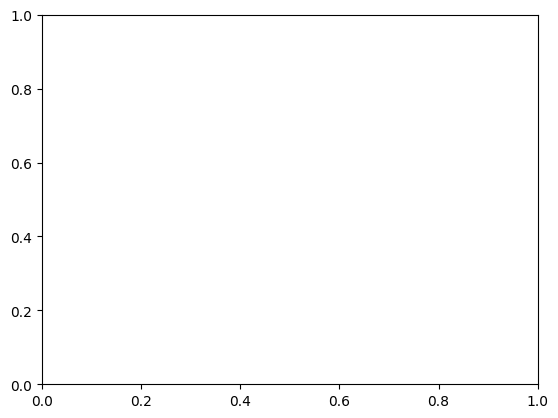

In [ ]:
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


with open(os.getcwd() + "/results/results_" + MODEL_NAME +  "_accuracy.pkl", 'wb') as output:
    pickle.dump(history.history, output, pickle.HIGHEST_PROTOCOL)
    if experiment is not None:
        experiment.log_asset(os.getcwd() + "/results/results_" + MODEL_NAME +  f"_accuracy.pkl")
    
# list all data in history
print(history.history.keys())
x = np.asarray(range(1,EPOCHS + 1))
# summarize history for accuracy
plt.figure()
plt.plot(x, smooth([y*100 for y in history.history['accuracy']],2))
# plt.plot(x, [y*100 for y in history_history['val_acc']])
plt.plot(x, smooth([y*100 for y in history.history['val_accuracy']],2))
plt.ylabel('Accuracy (%)')
plt.xlabel('Epochs')
plt.ylim(50,100) ###########################
plt.legend(['Training', 'Test'], loc='lower right')
plt.grid()
# plt.sakvefig(os.getcwd() + "/results/" f"accuracy_{MES}_{embeddings_name}.png", dpi=300, bbox_inches='tight')
plt.savefig(RESULTS_PATHS + "graficos/" + f"accuracy_{MES}_{embeddings_name}_{batches}_{class_weight_bool}.png", dpi=300, bbox_inches='tight')
plt.show()


### Final Evaluation of the Model

In [ ]:
test_scores = model.evaluate(x_test_mapped, y_test_vector, batch_size=val_batch_size, verbose=1)
print("Accuracy: %.2f%%" % (test_scores[1]*100))  

1868/1868 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9457 - auc: 0.9912 - loss: 0.1625 - precision: 0.9475 - recall: 0.9440
Accuracy: 94.41%


In [ ]:
# y_test_prediction = model.predict_classes(x_test, batch_size=val_batch_size, verbose=1)
y_test_predictions_prob = model.predict(x_test_mapped, batch_size=val_batch_size, verbose=1)
# Obtener pradicciones de las clases
y_test_prediction = np.argmax(y_test_predictions_prob, axis=1)

1868/1868 ━━━━━━━━━━━━━━━━━━━━ 1s 700us/step


In [ ]:
# y_training_prediction = model.predict_classes(x_training, batch_size=val_batch_size, verbose=1)
y_training_predictions_prob = model.predict(x_training_mapped, batch_size=val_batch_size, verbose=1)
# Obtener las clases predichas
y_training_prediction = np.argmax(y_training_predictions_prob, axis=1)

7480/7480 ━━━━━━━━━━━━━━━━━━━━ 5s 715us/step


Guaradmos los resultados en un archivo inferencie_results_tor.txt

In [ ]:
ls /media/valentina/KINGSTON/TESIS/resulados


ls: cannot access '/media/valentina/KINGSTON/TESIS/resulados': No such file or directory


In [ ]:
# 

In [ ]:
# Guardamos los resultados en bgp2vec_results_tor.txt
# with open( f"results/graficos/inference_results_tor_{embeddings_name}_{MES}_{batches}_{class_weight_bool}.txt", "w") as f:
#     # AS1 | AS2 | Predicción | Real
#     for i in range(len(y_test_prediction)):
#         f.write(f"{x_test_mapped[i][0]}|{x_test_mapped[i][1]}|{y_test_prediction[i]}|{y_test[i]} \n")

with open( RESULTS_PATHS + f"inferencias_gnn/por_etapas/inference_results_tor_{embeddings_name}_{MES}_{batches}_{class_weight_bool}.txt", "w") as f:
    # AS1 | AS2 | Predicción | Real
    for i in range(len(y_training_prediction)):
        f.write(f"{x_training_mapped[i][0]}|{x_training_mapped[i][1]}|{y_training_prediction[i]}|{y_training_filtered[i]} \n")

print("Archivo inference_results_tor.txt guardado correctamente.")

Archivo inference_results_tor.txt guardado correctamente.


### Plot and save a confusion matrix for results over the test set


In [ ]:
%matplotlib inline

import matplotlib
import pylab as pl
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          fname='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        fname = fname + "_normalized"
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        plt.imshow([[100*j for j in i] for i in cm], interpolation='nearest', cmap=cmap)
        cbar = plt.colorbar()
        cbar.ax.set_yticklabels(['0%','20%','40%','60%','80%','100%'])
    else:
        print('Confusion matrix, without normalization')
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, format(cm[i, j]*100, fmt) + '%',
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")    
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    # plt.savefig(os.getcwd() + "/results/graficos/" + fname + f"_{MES}_{embeddings_name}_{batches}_{class_weight_bool}.png", dpi=300, bbox_inches='tight')
    plt.savefig(RESULTS_PATHS + "graficos/" + fname + f"_{MES}_{embeddings_name}_{batches}_{class_weight_bool}.png", dpi=300, bbox_inches='tight')

In [ ]:
ls /media/valentina/KINGSTON/TESIS/resultados/graficos


 accuracy_febrero_bgp2vec_with_no_batches_with_class_weight.png*
 accuracy_febrero_bgp2vec_with_no_batches_with_no_class_weight.png*
 accuracy_febrero_embeddings_deepWalk_febrero_with_batches_with_no_class_weight.png*
 accuracy_febrero_embeddings_deepWalk_febrero_with_no_batches_with_class_weight.png*
 accuracy_febrero_embeddings_deepWalk_febrero_with_no_batches_with_no_class_weight.png*
 accuracy_febrero_embeddings_ribs_DotProduct_GAT_2022_attr_febrero_with_no_batches_with_class_weight.png*
 accuracy_febrero_embeddings_ribs_DotProduct_GAT_2022_attr_febrero_with_no_batches_with_no_class_weight.png*
 accuracy_febrero_embeddings_ribs_DotProduct_GAT_grado_attr_febrero_with_batches_with_class_weight.png*
 accuracy_febrero_embeddings_ribs_DotProduct_GAT_grado_attr_febrero_with_batches_with_no_class_weight.png*
 accuracy_febrero_embeddings_ribs_DotProduct_GAT_grado_attr_febrero_with_no_batches_with_class_weight.png*
 accuracy_febrero_embeddings_ribs_DotProduct_GAT_grado_attr_febrero_with_no_

Confusion matrix, without normalization
Normalized confusion matrix


/tmp/ipykernel_6217/4212788044.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(['0%','20%','40%','60%','80%','100%'])


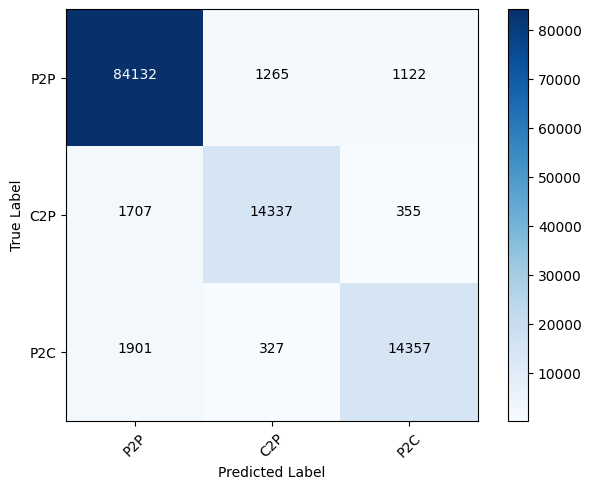

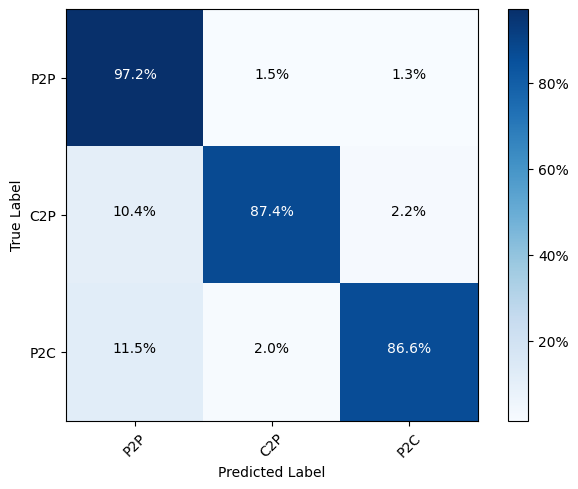

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test_filtered, y_test_prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized Confusion Msatrix')

plt.show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_metric(history, metric, ylabel=None, smooth_box=2,
                save_dir=RESULTS_PATHS + "graficos/",
                filename_prefix="", ylim=None):
    # eje X (épocas)
    epochs = len(history.history[list(history.history.keys())[0]])
    x = np.arange(1, epochs + 1)

    # series
    y_train = np.array(history.history.get(metric, []))
    y_val   = np.array(history.history.get(f"val_{metric}", []))

    if y_train.size == 0 or y_val.size == 0:
        print(f"[AVISO] Métrica '{metric}' no está en history. Omite el plot.")
        return

    # opcional: suavizado tipo moving average
    def _smooth(y, k):
        if k is None or k <= 1: 
            return y
        box = np.ones(k) / k
        return np.convolve(y, box, mode='same')

    # si son proporciones (0–1), pásalas a %
    as_percent = metric in {"accuracy","precision","recall","auc"}
    if as_percent:
        y_train = y_train * 100.0
        y_val   = y_val   * 100.0

    y_train_s = _smooth(y_train, smooth_box)
    y_val_s   = _smooth(y_val, smooth_box)

    plt.figure()
    plt.plot(x, y_train_s, label="Training")
    plt.plot(x, y_val_s,   label="Validation")
    plt.xlabel("Epochs")
    plt.ylabel(ylabel or (metric.upper() + (" (%)" if as_percent else "")))
    if ylim:
        plt.ylim(*ylim)
    plt.grid(True)
    plt.legend(loc="lower right")

    # Guardado
    os.makedirs(save_dir, exist_ok=True)
    fname = f"{filename_prefix}{metric}.png" if filename_prefix else f"{metric}.png"
    plt.savefig(os.path.join(save_dir, fname), dpi=300, bbox_inches='tight')
    plt.show()


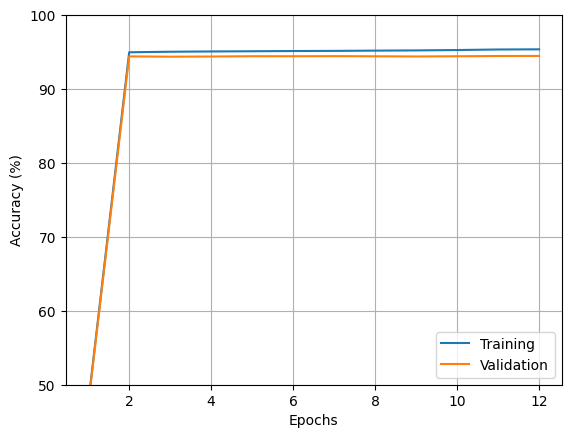

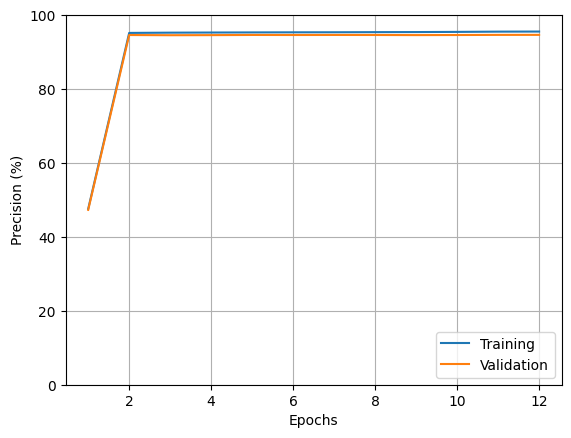

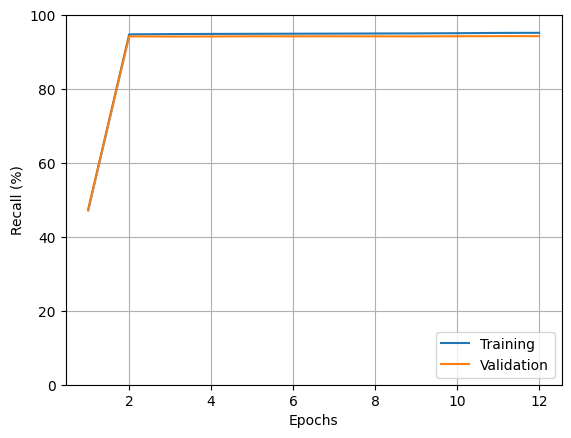

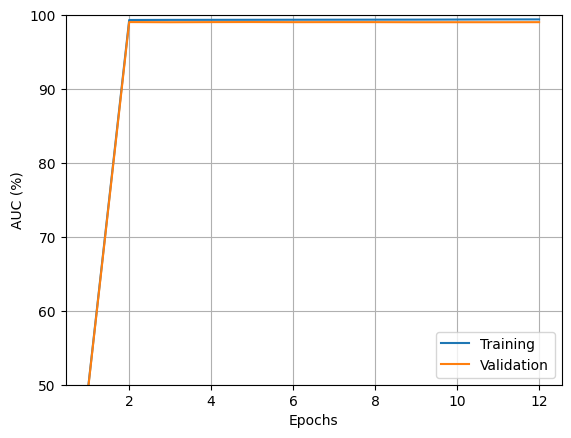

In [ ]:
# Guarda el history como ya haces:
with open(os.getcwd() + "/results/results_" + MODEL_NAME + "_accuracy.pkl", 'wb') as output:
    pickle.dump(history.history, output, pickle.HIGHEST_PROTOCOL)
    if experiment is not None:
        experiment.log_asset(os.getcwd() + "/results/results_" + MODEL_NAME + "_accuracy.pkl")

# Plots
plot_metric(history, "accuracy", ylabel="Accuracy (%)", filename_prefix=f"{MES}_{embeddings_name}_{batches}_{class_weight_bool}_", ylim=(50,100))
plot_metric(history, "precision", ylabel="Precision (%)", filename_prefix=f"{MES}_{embeddings_name}_{batches}_{class_weight_bool}_", ylim=(0,100))
plot_metric(history, "recall",    ylabel="Recall (%)",    filename_prefix=f"{MES}_{embeddings_name}_{batches}_{class_weight_bool}_", ylim=(0,100))
plot_metric(history, "auc",       ylabel="AUC (%)",       filename_prefix=f"{MES}_{embeddings_name}_{batches}_{class_weight_bool}_", ylim=(50,100))


In [ ]:
# Valores finales (última época) de las métricas
final_acc       = history.history['accuracy'][-1] * 100
final_val_acc   = history.history['val_accuracy'][-1] * 100
final_precision = history.history['precision'][-1] * 100
final_val_prec  = history.history['val_precision'][-1] * 100
final_recall    = history.history['recall'][-1] * 100
final_val_recall= history.history['val_recall'][-1] * 100
final_auc       = history.history['auc'][-1] * 100
final_val_auc   = history.history['val_auc'][-1] * 100

print("=== Resultados finales ===")
# print(f"Accuracy      (train): {final_acc:.2f}%")
# print(f"Precision     (train): {final_precision:.2f}%")
# print(f"Recall        (train): {final_recall:.2f}%")



print(f"Precision     (val)  : {final_val_prec:.2f}%")
print(f"Recall        (val)  : {final_val_recall:.2f}%")
print(f"Accuracy      (val)  : {final_val_acc:.2f}%")



=== Resultados finales ===
Precision     (val)  : 94.66%
Recall        (val)  : 94.32%
Accuracy      (val)  : 94.48%
